In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# read dataset from the web (our github repository)
# dataset source: https://www.kaggle.com/adityakadiwal/water-potability
url <- 'https://raw.githubusercontent.com/ricardoliu99/dsci100-group21/main/water_potability.csv'
download.file(url, 'water_potability.csv')
water <- read_csv('water_potability.csv') %>% mutate(Potability=as.factor(Potability))
water

Parsed with column specification:
cols(
  ph = col_double(),
  Hardness = col_double(),
  Solids = col_double(),
  Chloramines = col_double(),
  Sulfate = col_double(),
  Conductivity = col_double(),
  Organic_carbon = col_double(),
  Trihalomethanes = col_double(),
  Turbidity = col_double(),
  Potability = col_double()
)



ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1
5.126763,230.6038,11983.87,6.303357,NA,402.8831,11.16895,77.48821,4.708658,1
7.874671,195.1023,17404.18,7.509306,NA,327.4598,16.14037,78.69845,2.309149,1


In [3]:
# split data into 60% training data and  40% test data
water_split <- initial_split(water, prop = 0.60, strata = Potability)
water_train <- training(water_split)
water_test <- testing(water_split)
water_train
water_test

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.808856,193.5532,17329.80,8.061362,NA,392.4496,19.90323,NA,2.798243,1
5.126763,230.6038,11983.87,6.303357,NA,402.8831,11.16895,77.48821,4.708658,1
7.874671,195.1023,17404.18,7.509306,NA,327.4598,16.14037,78.69845,2.309149,1


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.36382,62.79831,4.401425,0
7.119824,156.7050,18730.81,3.606036,282.3441,347.7150,15.92954,79.50078,3.445756,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
8.372910,169.0871,14622.75,7.547984,NA,464.5256,11.08303,38.43515,4.906358,1
6.069616,186.6590,26138.78,7.747547,345.7003,415.8870,12.06762,60.41992,3.669712,1
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1


In [4]:
# count number of observations for each class in training data
class_count <- water_train %>% 
    group_by(Potability) %>% 
    summarize(counts = n()) %>% 
    mutate(proportion = 100*counts/nrow(water_train))
class_count
# calculate mean of each predictor variable
predictor_means <- water_train %>%
    select(-Potability) %>% 
    map_df(mean, na.rm = TRUE)
predictor_means
# count number of observation with at least one missing value (NA)
missing_rows <- water_train %>%
    filter(is.na(ph) | is.na(Hardness) | is.na(Solids) | is.na(Chloramines) | 
           is.na(Sulfate) | is.na(Conductivity) | is.na(Organic_carbon) | 
           is.na(Trihalomethanes) | is.na(Turbidity)) %>% 
    nrow()
missing_rows

`summarise()` ungrouping output (override with `.groups` argument)



Potability,counts,proportion
<fct>,<int>,<dbl>
0,1199,60.98678
1,767,39.01322


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.08322,196.8623,22173.83,7.102138,334.0765,428.6891,14.31388,66.62283,3.965576


[1] 793

Warning message:
“Removed 303 rows containing non-finite values (stat_bin).”


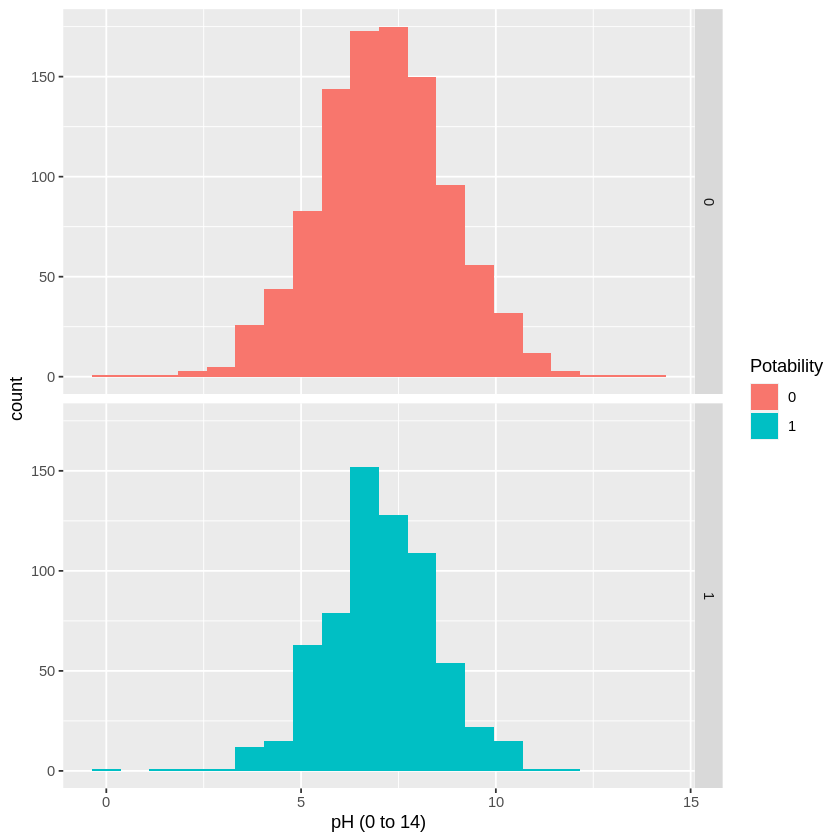

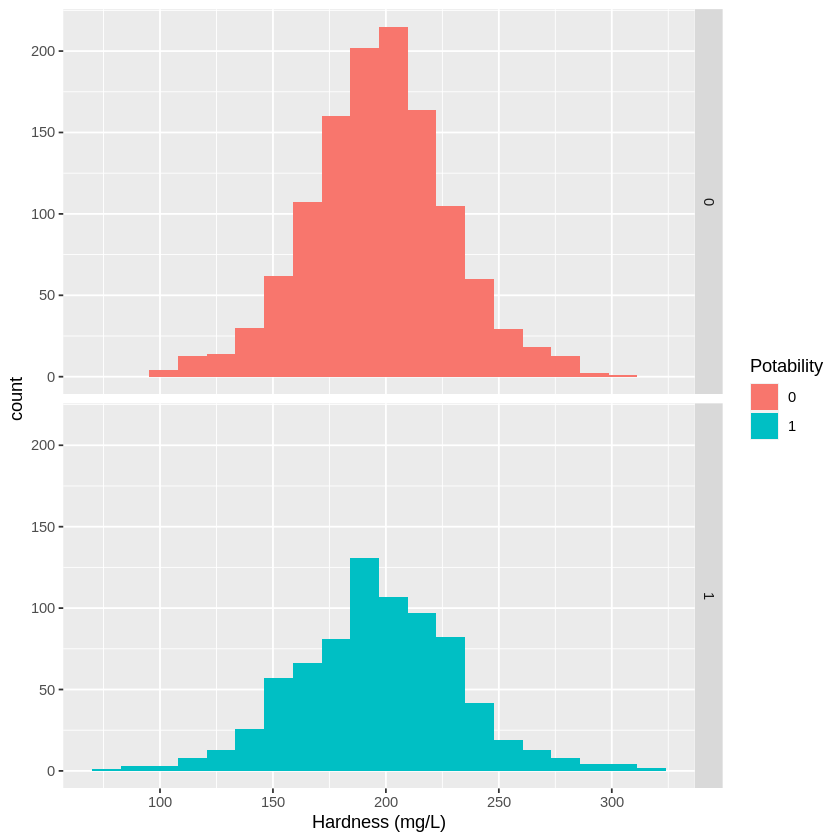

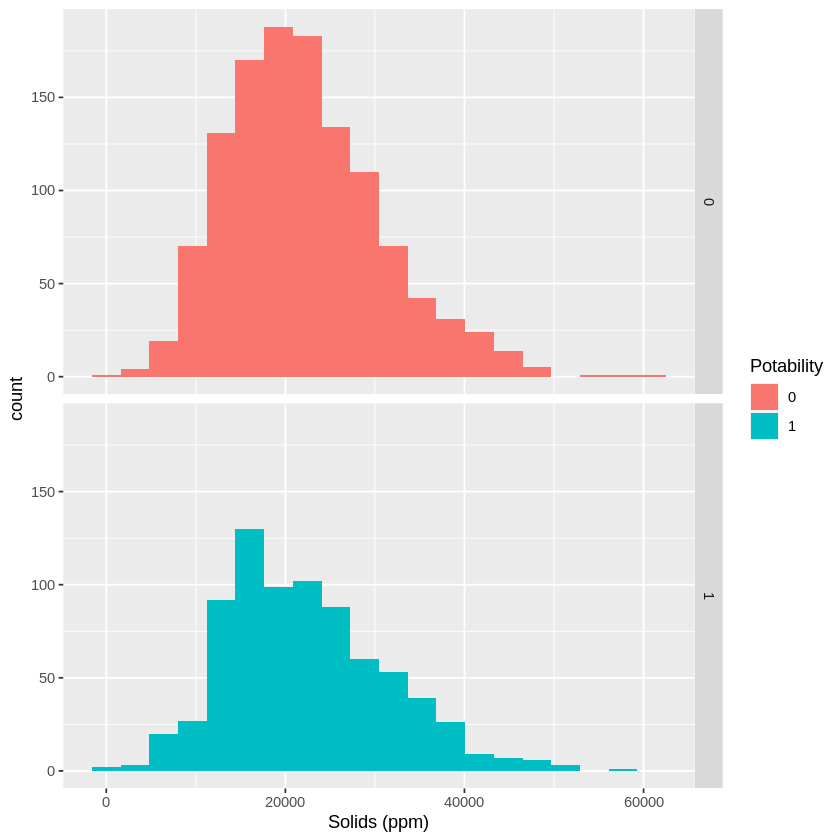

Warning message:
“Removed 496 rows containing non-finite values (stat_bin).”


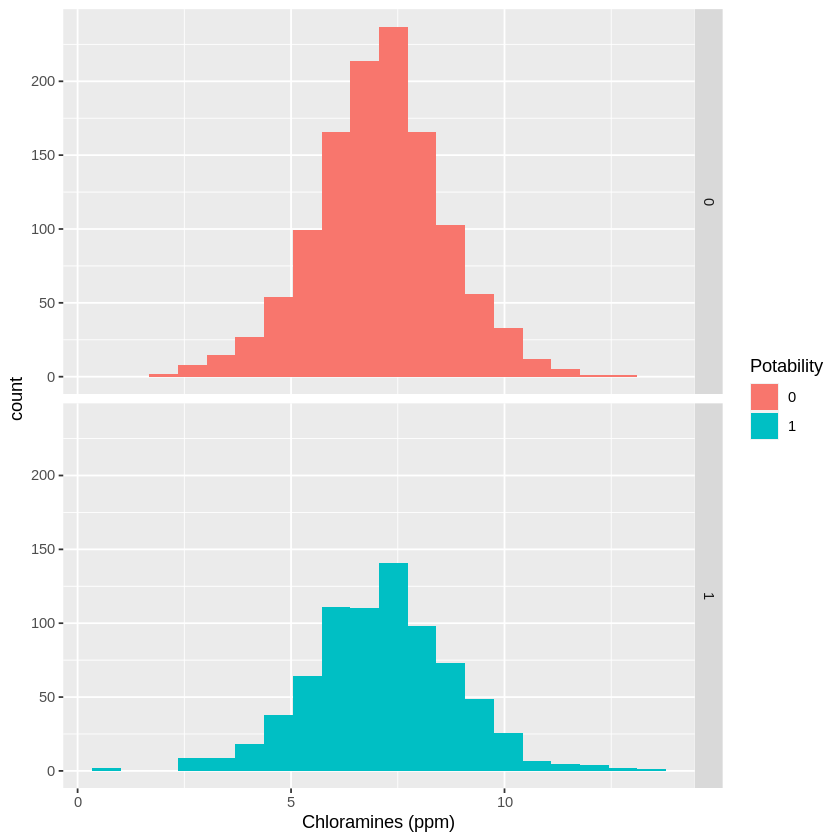

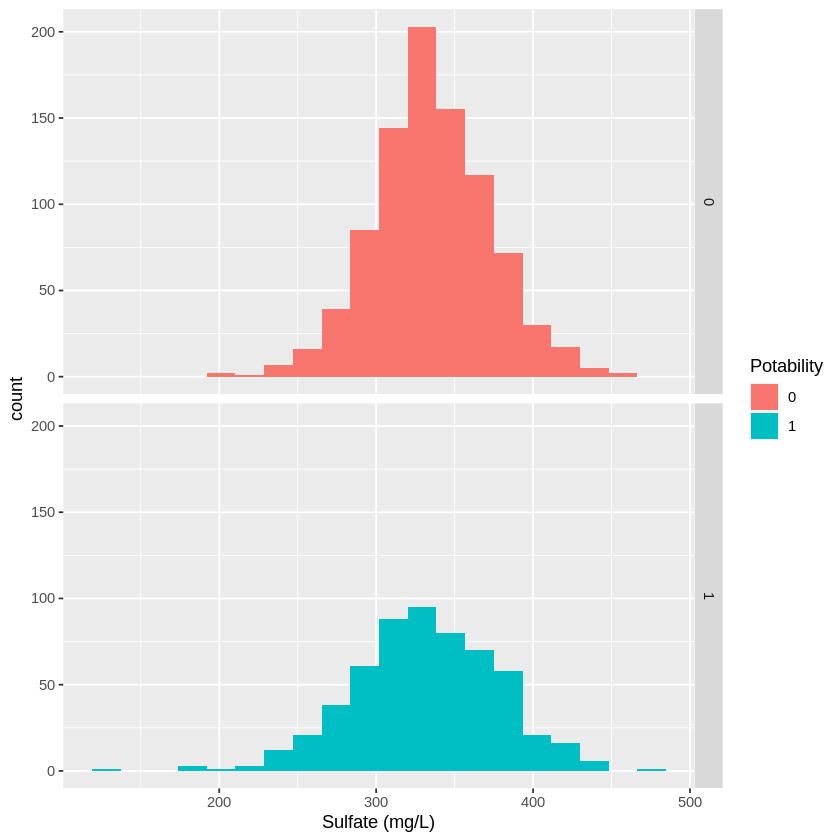

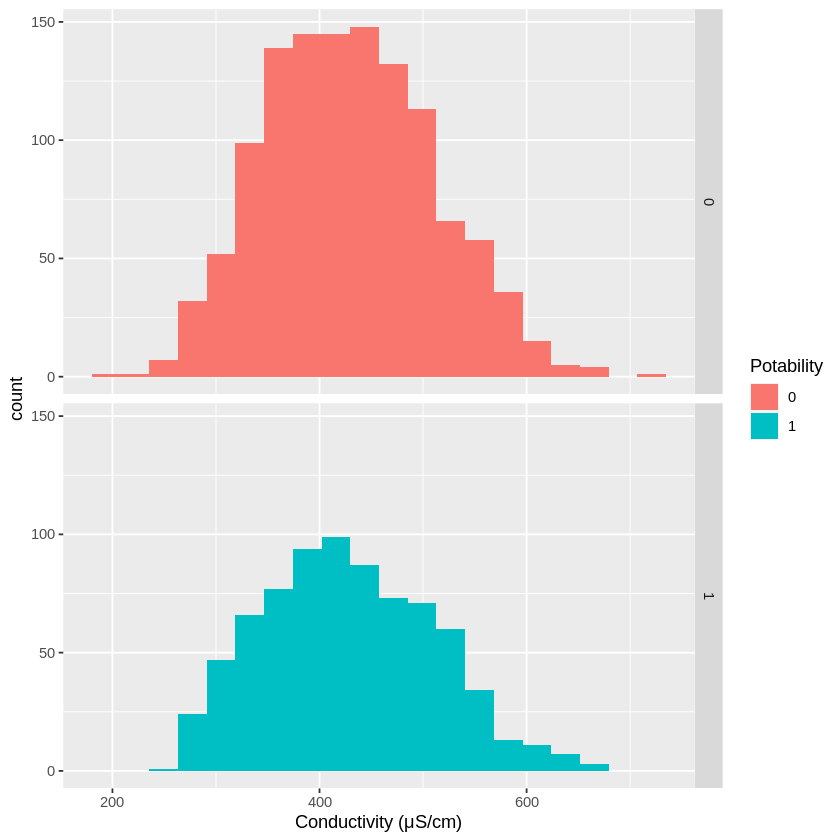

Warning message:
“Removed 103 rows containing non-finite values (stat_bin).”


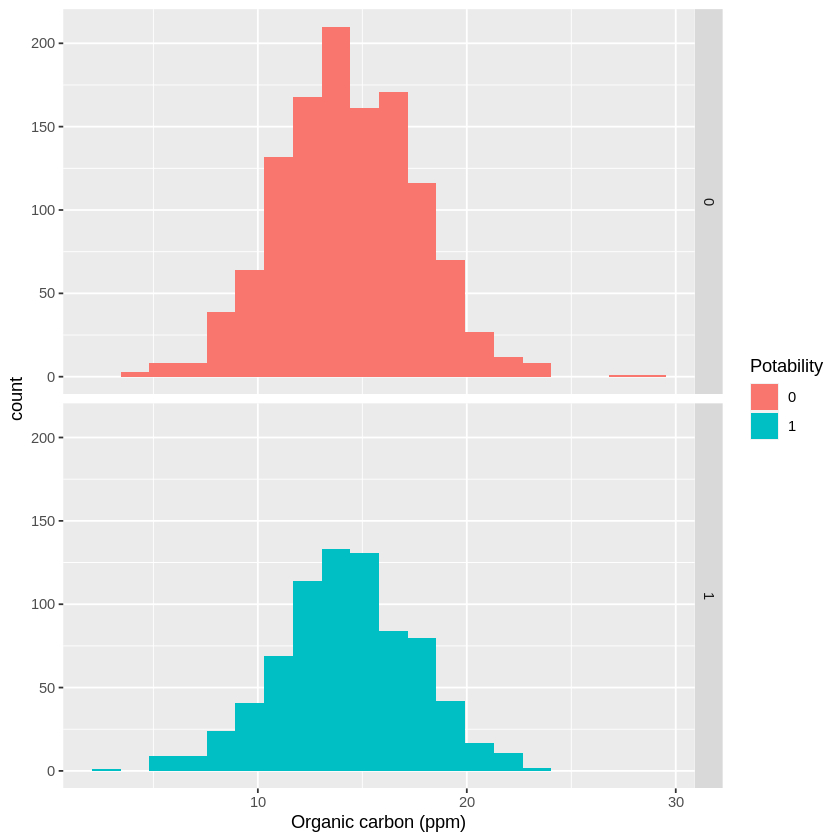

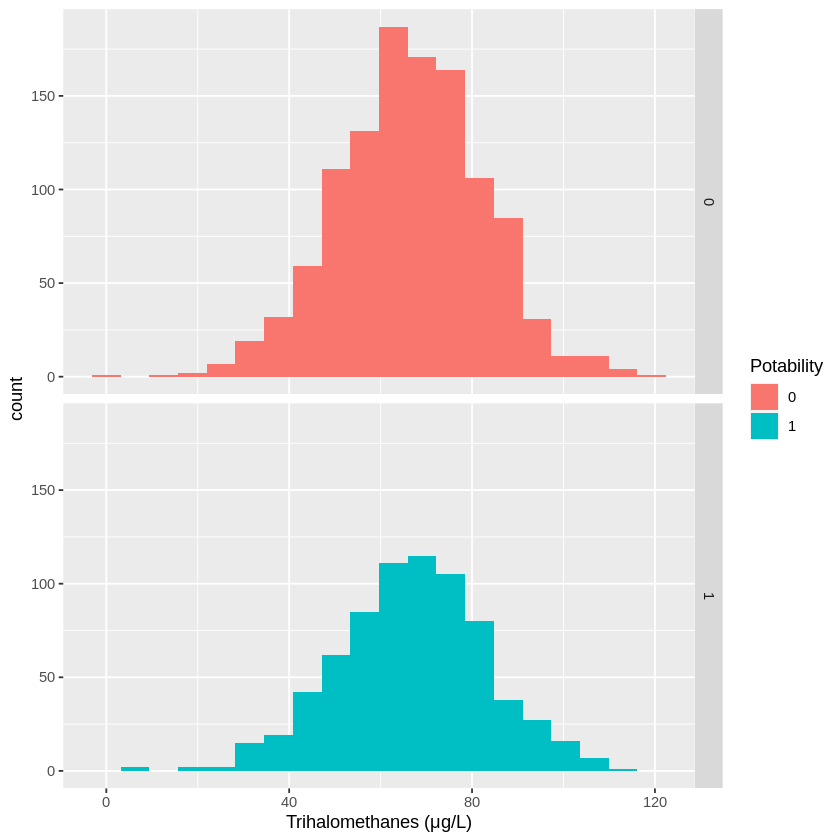

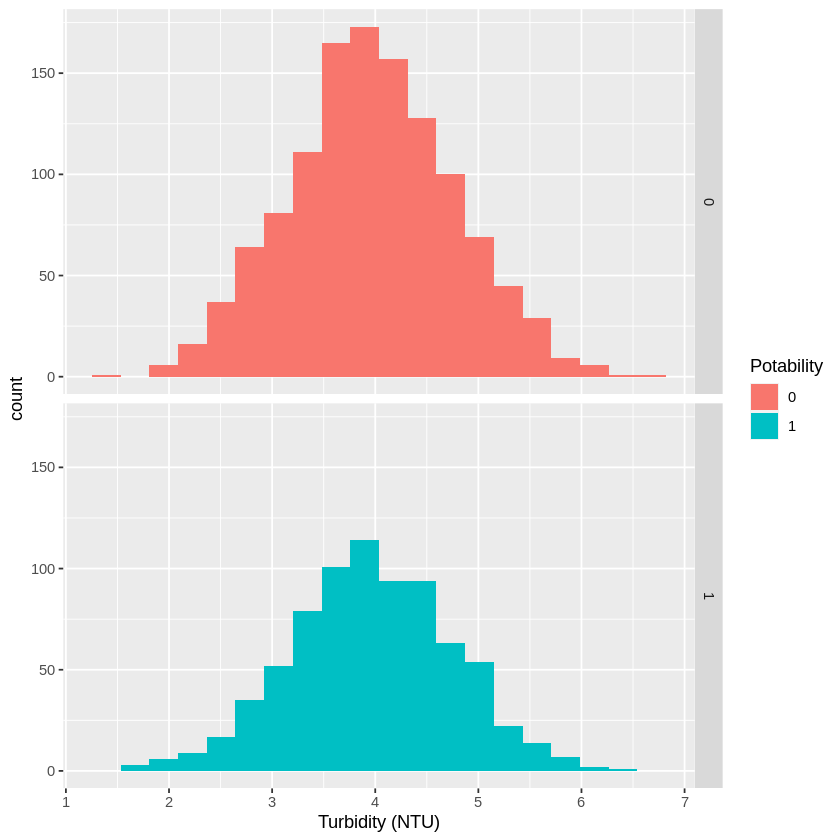

In [5]:
# create histogram for each column separated by its Potability label
water_cols <- names(water)
cols_units <- c("pH (0 to 14)", "Hardness (mg/L)", "Solids (ppm)", "Chloramines (ppm)",
               "Sulfate (mg/L)", "Conductivity (μS/cm)", "Organic carbon (ppm)",
               "Trihalomethanes (μg/L)", "Turbidity (NTU)")
for (col in 1:9) {
    histogram_plt <- ggplot(water_train, aes_string(x=water_cols[col])) +
        geom_histogram(aes(fill=Potability), bins=20) +
        labs(x=cols_units[col]) + 
        facet_grid(rows=vars(Potability))
    print(histogram_plt)
}